<a href="https://colab.research.google.com/github/PGrubisic/Racunalni_vid_labovi/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Funkcija za prikazivanje slike
def prikazi_sliku(img, naslov="Slika"):
    if len(img.shape) == 3:
        img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
    else:
        plt.imshow(img, cmap='gray')
    plt.title(naslov)
    plt.axis('off')
    plt.show()

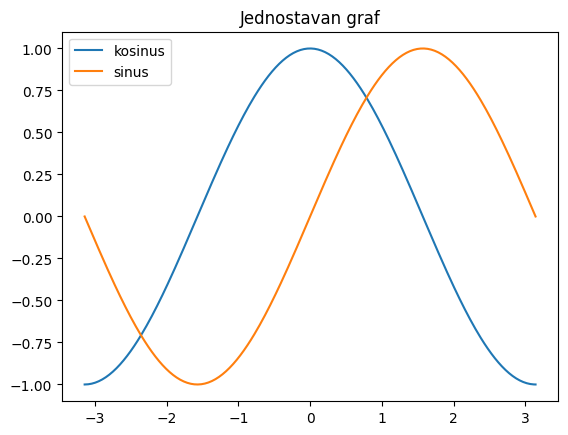

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generiramo podatke
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

# Crtanje
plt.plot(X, C, label="kosinus")
plt.plot(X, S, label="sinus")
plt.legend()
plt.title("Jednostavan graf")
plt.show()

In [5]:
import cv2 as cv

def uniform_noise(img, low, high):
    noise = np.random.uniform(low, high, img.shape)
    noisy_img = img.astype(np.float32) + noise
    return np.clip(noisy_img, 0, 255).astype(np.uint8)

def gaussian_noise(img, mu, sigma):
    noise = np.random.normal(mu, sigma, img.shape)
    noisy_img = img.astype(np.float32) + noise
    return np.clip(noisy_img, 0, 255).astype(np.uint8)

def salt_n_pepper_noise(img, percent=10):
    out = np.copy(img)
    num_salt = np.ceil(percent * img.size * 0.5 / 100)
    num_pepper = np.ceil(percent * img.size * 0.5 / 100)

    # Salt (bijele točkice)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in img.shape[:2]]
    out[tuple(coords)] = 255

    # Pepper (crne točkice)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in img.shape[:2]]
    out[tuple(coords)] = 0
    return out

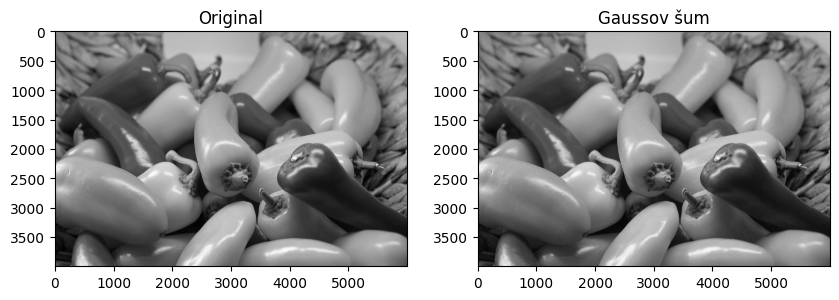

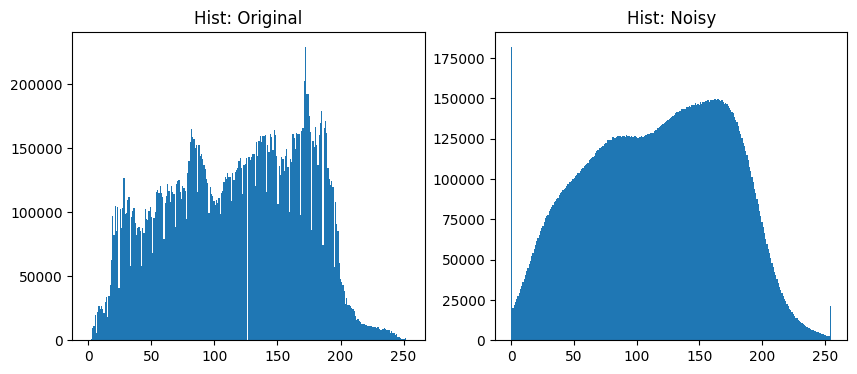

In [7]:
# Učitavaje sliku kao grayscale (crno-bijelu) jer je lakše za histogram
img = cv.imread('/content/test_slika.jpg', 0)

if img is None:
    print("Slika nije pronađena! Provjeri ime datoteke.")
else:
    # Dodajemo Gaussov šum (sigma = 15)
    img_noisy = gaussian_noise(img, 0, 15)

    # Prikaz slike i šuma
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1); plt.imshow(img, cmap='gray'); plt.title("Original")
    plt.subplot(1, 2, 2); plt.imshow(img_noisy, cmap='gray'); plt.title("Gaussov šum")
    plt.show()

    # Prikaz histograma
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1); plt.hist(img.flatten(), bins=256); plt.title("Hist: Original")
    plt.subplot(1, 2, 2); plt.hist(img_noisy.flatten(), bins=256); plt.title("Hist: Noisy")
    plt.show()

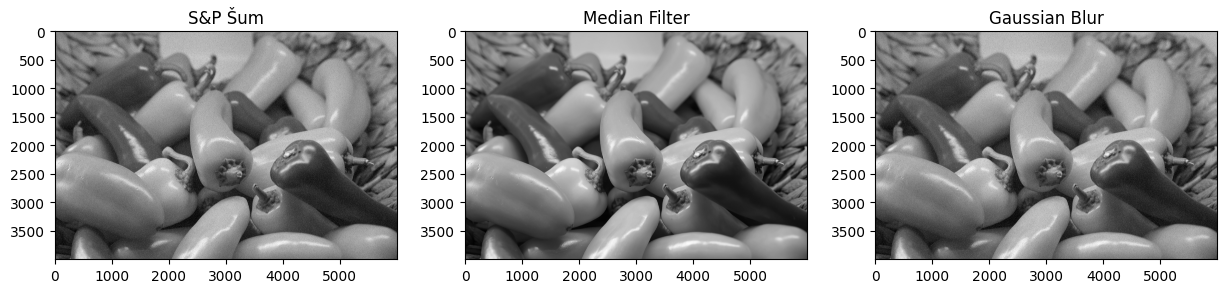

In [8]:
# 1. Dodavanje 10% S&P šuma
sp_img = salt_n_pepper_noise(img, 10)

# 2. Median filter (čisti točkice, čuva rubove)
median_clean = cv.medianBlur(sp_img, 3)

# 3. Gaussian blur (samo muti sliku)
gaussian_blur = cv.GaussianBlur(sp_img, (5, 5), 0)

# Prikaz usporedbe
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1); plt.imshow(sp_img, cmap='gray'); plt.title("S&P Šum")
plt.subplot(1, 3, 2); plt.imshow(median_clean, cmap='gray'); plt.title("Median Filter")
plt.subplot(1, 3, 3); plt.imshow(gaussian_blur, cmap='gray'); plt.title("Gaussian Blur")
plt.show()

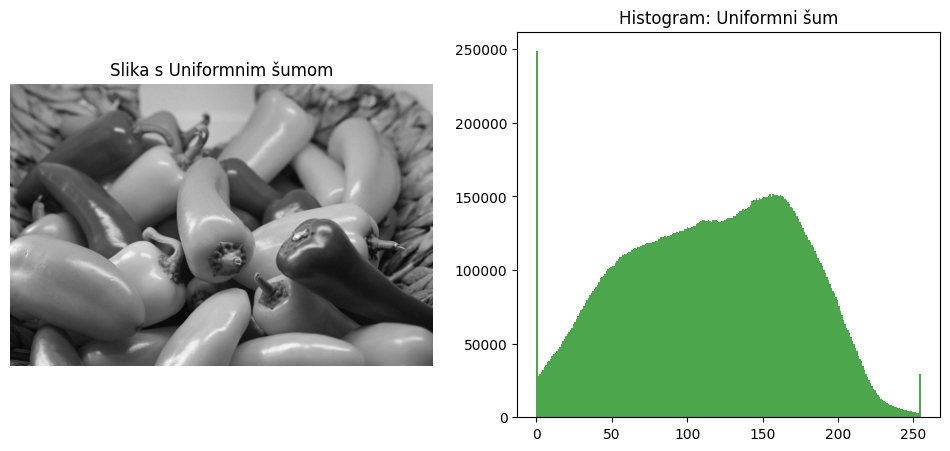

In [9]:
# 1. Dodajemo uniformni šum (npr. raspon od -30 do 30)
img_uniform = uniform_noise(img, -30, 30)

# 2. Prikaz slike i histograma
plt.figure(figsize=(12, 5))

# Slika
plt.subplot(1, 2, 1)
plt.imshow(img_uniform, cmap='gray')
plt.title("Slika s Uniformnim šumom")
plt.axis('off')

# Histogram
plt.subplot(1, 2, 2)
plt.hist(img_uniform.flatten(), bins=256, color='green', alpha=0.7)
plt.title("Histogram: Uniformni šum")

plt.show()

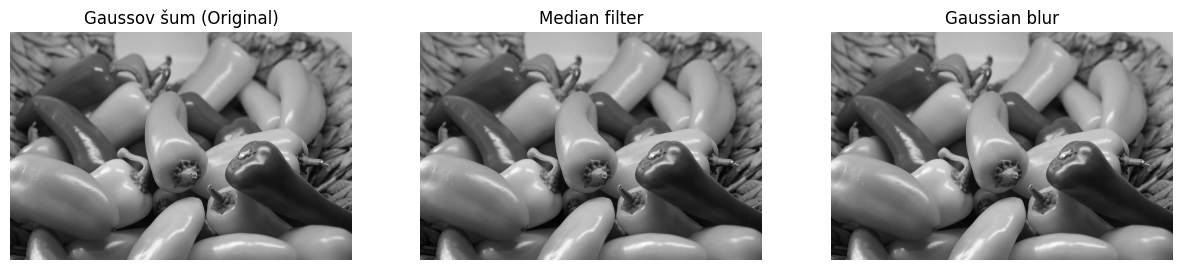

In [10]:
# 1. Generiranje slike s Gaussovim šumom (sigma=15)
gauss_noisy = gaussian_noise(img, 0, 15)

# 2. Pokušaj popravljanja s Median filterom (veličina 3 ili 5)
median_recovered = cv.medianBlur(gauss_noisy, 5)

# 3. Pokušaj ppopravljanja s Gaussian blurom (kernel 5x5, sigma=1)
gaussian_recovered = cv.GaussianBlur(gauss_noisy, (5, 5), 1)

# Prikaz usporedbe
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gauss_noisy, cmap='gray')
plt.title("Gaussov šum (Original)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(median_recovered, cmap='gray')
plt.title("Median filter")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gaussian_recovered, cmap='gray')
plt.title("Gaussian blur")
plt.axis('off')

plt.show()